<a href="https://colab.research.google.com/github/namphuong20146470/namphuong20146470/blob/main/cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np

from keras.datasets import cifar100
from keras.utils.np_utils import to_categorical   
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

In [13]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)
X=X_test

Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


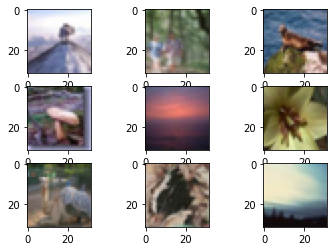

In [14]:
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X[i])
plt.show()

In [15]:
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=3072))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [46]:
history = model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 9s 28ms/step - loss: 2.0764 - accuracy: 0.4565 - val_loss: 2.1417 - val_accuracy: 0.4346
Epoch 2/20
313/313 [==============================] - 5s 16ms/step - loss: 2.0259 - accuracy: 0.4673 - val_loss: 2.3097 - val_accuracy: 0.4066
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 1.9846 - accuracy: 0.4764 - val_loss: 2.3028 - val_accuracy: 0.4061
Epoch 4/20
313/313 [==============================] - 5s 16ms/step - loss: 1.9426 - accuracy: 0.4842 - val_loss: 2.3520 - val_accuracy: 0.3932
Epoch 5/20
313/313 [==============================] - 5s 16ms/step - loss: 1.9139 - accuracy: 0.4913 - val_loss: 2.3894 - val_accuracy: 0.3862
Epoch 6/20
313/313 [==============================] - 5s 17ms/step - loss: 1.8753 - accuracy: 0.4991 - val_loss: 2.4213 - val_accuracy: 0.3848
Epoch 7/20
313/313 [==============================] - 5s 16ms/step - loss: 1.8440 - accuracy: 0.5060 - val_loss: 2.4739 - val_accuracy: 0.3760

In [47]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss =', score[0])
print('Test accurracy =', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 4.2197 - accuracy: 0.2402
Test loss = 4.219742774963379
Test accurracy = 0.2401999980211258


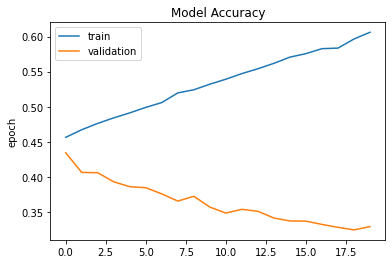

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','validation'],loc='upper left')

[1.2764873e-08 1.5974852e-06 4.2336443e-03 6.8484043e-04 7.2395261e-03
 7.1154535e-04 1.2397404e-06 1.9078159e-04 1.4018463e-02 5.2917942e-05
 1.8566840e-05 3.7486025e-03 1.5047945e-01 1.2906023e-03 8.6576222e-07
 6.2261184e-04 4.8087037e-04 6.8069175e-02 5.1670952e-07 6.2393188e-03
 2.5784660e-05 2.5766678e-06 1.9987781e-05 3.3832811e-02 7.9688680e-06
 1.4652926e-03 1.8448709e-03 2.1829621e-04 2.6832818e-04 3.5146234e-04
 7.6315831e-04 1.7564625e-02 6.2157772e-04 3.7232137e-03 1.7534664e-03
 3.3340682e-04 3.2598102e-03 6.8269079e-03 1.6657342e-03 4.9983107e-02
 4.7767842e-03 1.9496518e-05 1.4702072e-02 7.7689554e-05 2.5708887e-05
 3.1496151e-05 4.1828057e-04 6.4346525e-05 3.5686480e-05 1.8591675e-01
 4.4588200e-04 4.3293832e-05 6.5306500e-05 1.5816301e-08 2.3473260e-05
 2.0042984e-02 9.8333207e-05 2.5263848e-06 9.7777415e-04 2.0908065e-02
 1.6657254e-04 9.7172756e-07 5.6835745e-08 4.4899429e-03 4.6357447e-05
 1.3491475e-03 1.1089358e-04 5.3415698e-04 9.9026915e-03 4.8254668e-03
 5.023

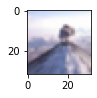

[3.7095088e-08 4.0477658e-05 8.6983797e-05 1.0556761e-03 5.7930695e-03
 2.9880215e-05 8.5243075e-05 6.4224476e-04 6.5019405e-03 1.1956453e-04
 3.8812290e-05 5.9750775e-05 1.6673239e-03 1.5784197e-05 4.6781928e-04
 1.1033551e-03 6.6995854e-05 5.5507775e-07 6.9190952e-04 6.0222163e-03
 2.0294327e-07 2.6776292e-03 4.8043823e-04 3.7295316e-04 3.1500995e-06
 8.5311389e-05 1.8570767e-05 4.3331743e-03 6.0112739e-04 1.0440614e-04
 3.2556491e-04 3.6510915e-02 4.8529576e-03 2.9585833e-02 8.5491588e-04
 2.2291064e-05 1.7957014e-04 4.1475217e-04 7.1066729e-04 2.2860871e-04
 1.5798677e-04 1.2148127e-03 8.2558952e-03 5.8684229e-05 2.6958226e-04
 3.5127778e-05 2.8015842e-04 8.6305896e-05 6.6961744e-03 2.0417988e-07
 2.6657041e-02 4.4145754e-06 1.0298401e-06 1.0118718e-09 6.2645267e-05
 2.1029706e-03 1.9407803e-03 1.6029857e-05 9.4253355e-06 5.7457841e-04
 2.4636440e-08 1.8797364e-05 3.4965507e-07 2.6664464e-02 3.5109427e-02
 1.7090704e-02 5.6173289e-01 6.9384632e-04 1.0157060e-04 2.0420337e-04
 8.089

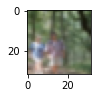

[3.00031911e-06 5.07393133e-06 2.36774504e-04 9.78427380e-03
 5.73755754e-03 1.16955880e-06 6.03149384e-02 1.49171319e-04
 1.10531677e-04 3.73527328e-05 2.45422598e-05 1.65532753e-02
 2.07639514e-05 2.87539617e-04 7.82458037e-02 2.61909097e-01
 1.54514564e-04 8.56480841e-03 2.80173321e-04 7.10258493e-03
 1.27381627e-05 9.82711299e-07 1.09952339e-03 3.37420192e-06
 3.92573347e-05 1.51053098e-06 2.93212943e-03 8.74644518e-02
 2.52299815e-05 1.24995003e-03 1.25734648e-03 8.55178107e-04
 6.70507652e-05 9.36219749e-06 5.72138699e-03 6.82728190e-04
 1.36347835e-05 1.99730113e-01 1.59787908e-02 1.17292162e-04
 2.98703908e-05 4.75608074e-04 2.42295268e-04 1.30368251e-04
 5.39278204e-04 2.43345436e-04 2.89842524e-02 1.63211196e-03
 1.73668508e-04 5.57414896e-04 9.07233116e-05 4.24530481e-05
 1.10695725e-02 3.65289770e-06 7.11744769e-06 6.51680026e-03
 7.57875713e-03 1.73976750e-05 6.78081487e-05 5.68991411e-04
 1.89717241e-06 1.03092347e-07 1.21215184e-03 7.27644920e-06
 1.04218104e-03 5.847903

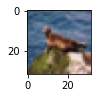

[6.8300694e-02 5.1155128e-02 2.1338381e-03 1.3188146e-02 5.0989643e-04
 2.0623470e-04 8.3632140e-06 1.5438159e-04 1.8839299e-05 3.2131895e-05
 1.1567914e-01 4.1490026e-02 1.4514265e-03 1.0068110e-02 7.0240667e-06
 1.0096770e-01 1.1455803e-02 1.9824652e-03 8.6577138e-06 4.0509374e-04
 4.5377456e-04 2.2894805e-03 3.0266340e-03 1.1175816e-05 5.6389117e-06
 4.4204245e-04 5.6203990e-03 7.0566137e-05 7.4421149e-04 1.5275348e-04
 5.3124953e-05 7.0658694e-05 8.0804853e-03 2.8710288e-05 1.1791333e-02
 6.0513099e-03 2.4360873e-02 2.2485310e-03 4.0955920e-04 2.3145470e-04
 6.7082115e-02 6.3496106e-04 7.5263830e-05 1.7572840e-05 1.0318927e-03
 7.5971341e-04 1.7830005e-02 2.7718666e-04 1.1546311e-01 4.0631658e-05
 1.6664619e-03 1.2368694e-02 1.4148453e-07 5.2921501e-07 4.6150768e-04
 1.8464018e-02 1.6981004e-03 6.1892765e-03 1.6266707e-02 8.3503746e-06
 1.7030906e-06 3.7040274e-05 1.8245445e-06 6.7009445e-05 9.0596359e-03
 2.3302133e-05 4.2177796e-02 4.0388634e-04 9.5895409e-08 3.5000598e-05
 1.990

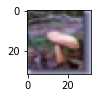

[7.30526051e-04 3.42841749e-03 3.82802718e-05 2.62015897e-06
 2.34917124e-07 6.79167260e-06 1.60290952e-07 3.88258522e-05
 3.75776406e-04 2.16452440e-06 1.06908294e-04 2.96096332e-05
 2.60108587e-04 1.05054824e-05 2.22210996e-08 1.51516394e-06
 5.15918015e-04 1.32859441e-06 1.63304705e-07 5.83202291e-06
 8.93929755e-05 2.56331873e-07 7.68547397e-05 1.07860655e-01
 1.53397835e-07 8.53638689e-04 1.25370949e-04 6.32397201e-09
 1.09622965e-03 4.07042797e-04 9.60461080e-08 4.01175521e-06
 1.06697655e-04 7.70828081e-03 7.66301866e-09 3.15629813e-06
 1.61956159e-05 1.28937754e-05 1.15490340e-09 1.59585443e-06
 2.25969765e-04 2.79986602e-06 1.67403556e-11 2.85562884e-09
 8.51421137e-05 1.12485699e-03 9.35362186e-06 1.13711343e-03
 1.07636224e-05 5.40185794e-02 3.14075032e-06 4.28791736e-06
 4.99640407e-07 8.91645591e-10 2.43847608e-03 4.27611937e-08
 4.81714224e-08 5.21177469e-07 8.35057435e-05 7.03034186e-10
 1.06106438e-01 6.48378318e-07 1.11043802e-03 1.35063360e-09
 3.00132763e-09 2.767135

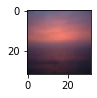

[1.63573059e-05 1.03344737e-05 1.12925605e-04 6.91263145e-03
 1.18889138e-02 2.96543158e-06 1.14042766e-03 4.32244735e-03
 2.59538701e-05 6.79136235e-07 5.44474809e-04 1.54952591e-04
 1.08144068e-05 8.63480527e-05 1.37161638e-03 8.96396290e-04
 2.48295737e-06 6.07158128e-08 4.12254158e-04 7.75544718e-03
 2.82667689e-09 1.17826648e-03 2.69685734e-06 2.18050318e-05
 6.62182574e-04 7.62646232e-05 2.62823542e-05 2.76964484e-03
 7.68147004e-07 3.50456939e-05 6.57023156e-06 2.26203743e-02
 9.83665348e-04 4.36416827e-04 2.19941046e-03 1.27208968e-05
 1.93991256e-03 2.16759036e-05 9.55981319e-04 1.14299182e-05
 9.10145914e-08 6.21466752e-05 3.72543582e-05 1.57066166e-01
 1.38217362e-03 1.08707510e-03 2.44793064e-05 1.83732027e-05
 2.25149251e-05 3.42349225e-08 4.50189710e-01 1.75999389e-06
 8.52773010e-05 8.19058315e-08 3.77162962e-07 2.56172987e-03
 6.52591977e-03 2.88710794e-07 2.49671615e-07 5.14749900e-07
 7.46874895e-10 1.43740564e-07 8.33585545e-06 5.57521172e-03
 3.07772774e-04 3.965897

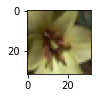

[4.46799313e-05 9.52915195e-03 4.58506169e-03 3.33464425e-03
 1.99453123e-02 1.63564959e-03 2.85447222e-05 1.52590565e-05
 6.32263161e-03 1.52693858e-04 5.11564489e-04 3.61175480e-05
 6.75230040e-05 3.78009956e-03 1.47517621e-05 6.47044880e-03
 2.08069128e-03 2.36164429e-03 1.61547470e-03 1.16851572e-02
 3.21130137e-05 1.54036155e-04 2.08918052e-03 3.32280481e-03
 2.06179061e-06 1.81067677e-03 6.95998780e-04 3.69167887e-02
 7.88455550e-03 4.26458288e-03 5.71632409e-04 1.62994489e-02
 2.03562481e-03 7.74747052e-04 1.60745457e-02 8.14986415e-04
 3.91681446e-03 5.26126765e-04 8.53482541e-03 7.42909452e-03
 5.47228788e-04 7.55875371e-04 2.00531017e-02 2.57675443e-03
 5.59105538e-03 1.87437836e-04 1.14092149e-03 7.51115731e-04
 1.46492394e-02 2.02990879e-04 3.43623757e-03 5.79378160e-04
 6.18888298e-04 1.71055726e-05 1.89957826e-03 9.83374938e-02
 4.76560963e-04 6.08125061e-04 8.45020550e-05 2.37580924e-03
 1.33003239e-04 2.98261206e-04 5.84096560e-05 1.70061260e-01
 2.28160191e-02 8.994590

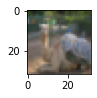

[1.25068682e-05 8.57009752e-07 1.64101748e-05 3.13086319e-03
 2.50145011e-02 2.69789482e-03 2.23026681e-03 1.90703183e-01
 8.14504092e-05 1.67977050e-04 4.47943946e-03 1.28924639e-05
 1.45206843e-06 2.76447281e-06 1.25439346e-01 5.50005789e-05
 1.01952195e-04 4.07348921e-07 1.64238596e-03 2.80934502e-04
 1.24037237e-04 6.90080924e-05 1.69332791e-02 4.57450187e-06
 2.54147984e-02 1.55546702e-03 2.12727487e-03 1.50646048e-03
 1.37518755e-05 1.16115378e-03 3.62725586e-06 1.32569100e-03
 1.41325130e-04 6.46710942e-06 1.80823872e-06 9.35297805e-07
 2.36847112e-03 1.86694215e-05 1.05460414e-04 1.83618104e-05
 4.27600440e-07 1.50646256e-05 5.17564877e-05 6.72410461e-05
 7.09152839e-04 9.68642358e-04 5.45716512e-06 5.89529554e-05
 2.11062761e-05 1.62609706e-06 2.69989464e-02 1.32374544e-05
 9.98076393e-06 1.93358272e-08 5.04635682e-05 3.54956575e-02
 3.82634596e-07 1.83812936e-05 1.93518235e-06 1.32905057e-04
 7.70484856e-11 2.57530424e-04 1.46589691e-05 8.07871204e-03
 2.78994814e-02 9.574198

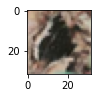

[7.90594368e-10 2.88190790e-07 4.73294790e-07 1.40961728e-10
 3.93409610e-11 7.47613449e-05 1.94142244e-10 2.92892341e-08
 1.52490514e-07 1.73598896e-11 4.00494855e-06 9.79219834e-08
 1.06068306e-07 1.79836633e-07 5.91537430e-10 1.57859592e-08
 5.76585251e-07 1.12993090e-08 4.06413569e-08 2.21256118e-06
 3.38254358e-05 5.77872169e-13 4.14913848e-06 9.79824960e-01
 1.76655391e-07 1.90594699e-06 2.19699414e-09 1.40118351e-11
 1.45513714e-05 2.48744072e-06 9.42669320e-09 8.03443179e-09
 1.09503073e-08 7.92271123e-07 1.98676839e-10 3.79155063e-09
 6.41219913e-08 1.34010688e-05 3.98270826e-12 3.77473981e-08
 2.20440306e-05 1.17548182e-09 4.73950166e-07 9.88491479e-07
 2.04098342e-06 5.98091844e-07 5.24037205e-06 4.50992616e-07
 1.71459388e-10 1.56437431e-03 6.47925713e-10 1.11523422e-08
 1.52686450e-08 8.71263305e-12 1.65996050e-09 3.95475919e-09
 1.30081785e-08 2.63579353e-10 3.13454041e-09 1.18548122e-07
 2.68982770e-03 1.18819816e-08 4.10115275e-09 1.30468802e-10
 6.05194367e-11 2.495786

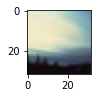

In [49]:
y_pred = model.predict(X_test)
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(X[i])
  print(y_pred[i])
  plt.show()